In [2]:
import pandas as pd # to work on data frames and can handle any outlier or noise records in datasets
import numpy as np # to get algebratic opertaion on data
import matplotlib.pyplot as plt # to visualize data and cleaning ( i do it to show outputs of my cleaning (my point of veiw)) 
import seaborn as sns

import re # this library work on regular expressions for pattern matching and string manipulation i search alot on it i understand this only
import string # this library has ASCII letters, digits, punctuation, and whitespace i use it to get (punctuation) to remove it from data
import nltk # library we use to preprocess on text data to make it clean and in standerd form to use it in NLP
from nltk.corpus import stopwords # this module we use to remove stopwords
from nltk.tokenize import word_tokenize # this module we use it to tokanise text into words
from nltk.stem import WordNetLemmatizer # this lemmatizedr get base of each word to make words in his base ( if verb , noun , adverb or adgectives)

In [2]:
# we read our csv file using pd.read_csv
data = pd.read_csv(r"D:\FCDS\semster 7\NLP\Assginments\Assginment 2\text classification\IMDB Dataset.csv")

In [3]:
# to show our records and columns and what this data contain.
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
# to know number of records , null values in dataset and datatype of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
#to describe statstical informations about all numeric attributes
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
#to know number of null values for all records in each column from our dataset
data.isnull().sum()

review       0
sentiment    0
dtype: int64

## **preprocessing on text column** 

In [8]:
# first we will download all necessary recourses to use ntlk
# for stopwords and punctuations and wordnet of english language
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def cleaninig(text):
    # 1) Convert all charcters in lowercase to make all words in standerd form
    # we save it in cleaned text
    cleaned_text = text.lower()
    
    # 2) remove urls 
    # Define a regex pattern to match URLs (i study regex patterns from datacamp)(course intro_NLP)
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Replace URLs with an empty string 
    # with this way we remove URLs from our comments
    cleaned_text = url_pattern.sub('', cleaned_text)
    
    # 3) remove special charcters
    # Define a regex pattern to match non-alphanumeric characters and spaces
    special_char_pattern = re.compile(r'[^a-zA-Z\s]')
    # Replace special characters with an empty string
    # with this way we remove special characters from our comments
    cleaned_text = special_char_pattern.sub('', cleaned_text)
    
    # 4) remove punctuations
    # Define a regex pattern to match punctuation characters
    # we use library string to get all punctation marks 
    punctuation_pattern = re.compile(f"[{re.escape(string.punctuation)}]")
    # Remove punctuation using the regex pattern
    cleaned_text =  punctuation_pattern.sub('', cleaned_text)
    
    # 5) tokanization
    # split text in words
    # using built-function word_tokenize(text)
    # return splitted words
    tokens = word_tokenize(cleaned_text)
    
    # 6) remove stopwords
    #we save stopwords of english language in varibale called stop_words
    #stopwords.words('') take parameter (language you want to get stopwords of it)
    stop_words = set(stopwords.words('english'))
    # we will save each token without stopwords in each record 
    # and will save it in cleaned_tokens
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    
    # 7) get base of words using (lemmatization)
    #take object from WordNetLemmatizer() to get base of each token(word)
    lemmatizer = WordNetLemmatizer()
    #apply lwmatization on each token on all nouns
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='n') for word in cleaned_tokens]
    #apply lwmatization on each lemmatized_tokens on all verbs
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='v') for word in lemmatized_tokens]
    #apply lwmatization on each lemmatized_tokens on all adverbs
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='r') for word in lemmatized_tokens]
    #apply lwmatization on each lemmatized_tokens on all adjectivs
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='a') for word in lemmatized_tokens]
    #return cummulative lemmatized_tokens (words)
    lemmatized_sentences = ' '.join(lemmatized_tokens)
    
    return lemmatized_sentences

In [10]:
# apply cleaning function on comment_text
data['cleaned_review'] = data['review'].apply(cleaninig)

<Axes: ylabel='count'>

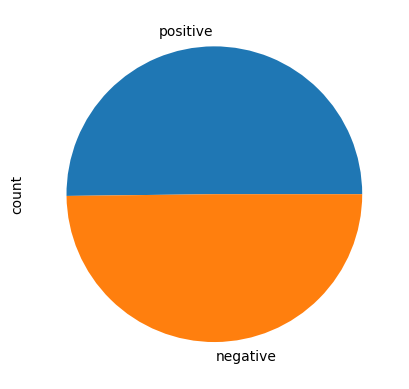

In [11]:
data.sentiment.value_counts().plot(kind='pie' ,color = 'b')

In [12]:
# Convert sentiment column to binary values
data['encoded_sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [13]:
data.head()

,review,sentiment,cleaned_review,encoded_sentiment
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode youll ho...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br film techniq...,1
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,1
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stun f...,1


In [14]:
# Filter the required columns
filtered_data = data[['cleaned_review', 'encoded_sentiment']]

# Save to CSV
filtered_data.to_csv('cleaned_reviews.csv', index=False)

print("File saved as 'cleaned_reviews.csv' with cleaned_review and encoded_sentiment.")


File saved as 'cleaned_reviews.csv' with cleaned_review and encoded_sentiment.


# Language Model

In [1]:
import os
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

# Path to the folder containing the files
DATA_PATH = r"D:\FCDS\semster 7\NLP\Assginments\Assginment 2\language model"

# File names
LINES_FILE = os.path.join(DATA_PATH, "movie_lines.txt")
CONVERSATIONS_FILE = os.path.join(DATA_PATH, "movie_conversations.txt")


In [2]:
# Setup paths
DATA_PATH = r"G:\mazen FCDS\FCDS\NLP\Assginment 2\language model"
LINES_FILE = os.path.join(DATA_PATH, "movie_lines.txt")
CONVERSATIONS_FILE = os.path.join(DATA_PATH, "movie_conversations.txt")

# Function to load movie lines
def load_lines(file_path):
    lines = {}
    with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
        for line in file:
            parts = line.strip().split(" +++$+++ ")
            if len(parts) >= 5:
                line_id, text = parts[0], parts[4]
                lines[line_id] = text
    return lines

# Function to load movie conversations
def load_conversations(file_path, lines):
    conversations = []
    with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
        for line in file:
            parts = line.strip().split(" +++$+++ ")
            if len(parts) >= 4:
                utterance_ids = eval(parts[3])  # Convert string to list
                conversations.append([lines[line_id] for line_id in utterance_ids if line_id in lines])
    return conversations

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9?.!]+", " ", text)  # Remove special characters
    text = re.sub(r"([?.!])", r" \1 ", text)       # Add space around punctuation
    text = re.sub(r"\s+", " ", text).strip()       # Remove extra spaces
    return text

# Load conversations
lines = load_lines(LINES_FILE)
conversations = load_conversations(CONVERSATIONS_FILE, lines)

# Clean each utterance
cleaned_conversations = [[clean_text(utterance) for utterance in conv] for conv in conversations]

# Download NLTK tokenization resources
nltk.download('punkt')

# Tokenize conversations
def tokenize(conversations):
    return [[word_tokenize(utterance) for utterance in conv] for conv in conversations]

# Tokenize cleaned conversations
tokenized_conversations = tokenize(cleaned_conversations)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bassel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Special tokens
PAD_TOKEN = "<PAD>"
SOS_TOKEN = "<SOS>"
EOS_TOKEN = "<EOS>"
UNK_TOKEN = "<UNK>"

# Build vocabulary function
def build_vocab(tokenized_conversations):
    counter = Counter()
    for conv in tokenized_conversations:
        for utterance in conv:
            counter.update(utterance)
    
    # Sort by frequency
    sorted_vocab = [word for word, _ in counter.most_common()]
    
    # Add special tokens
    vocab = [PAD_TOKEN, SOS_TOKEN, EOS_TOKEN, UNK_TOKEN] + sorted_vocab
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    idx2word = {idx: word for word, idx in word2idx.items()}
    return word2idx, idx2word

# Build vocabulary
word2idx, idx2word = build_vocab(tokenized_conversations)

# Convert sentences to sequences
def sentences_to_sequences(conversations, word2idx):
    sequences = []
    for conv in conversations:
        for utterance in conv:
            seq = [word2idx.get(word, word2idx[UNK_TOKEN]) for word in utterance]
            sequences.append([word2idx[SOS_TOKEN]] + seq + [word2idx[EOS_TOKEN]])
    return sequences

# Pad sequences
def pad_sequences(sequences, pad_token, vocab_size, max_length=None):
    # Find the maximum length of sequences if not provided
    if max_length is None:
        max_length = max(len(seq) for seq in sequences)

    # Pad sequences
    padded = []
    for seq in sequences:
        seq = [min(i, vocab_size - 1) for i in seq[:max_length]] + [pad_token] * max(0, max_length - len(seq))
        padded.append(seq)

    return padded, max_length

sequences = sentences_to_sequences(tokenized_conversations, word2idx)
padded_sequences, max_length = pad_sequences(sequences, word2idx[PAD_TOKEN], len(word2idx))

# Create input-output pairs
def create_input_output_pairs(padded_sequences):
    inputs = [seq[:-1] for seq in padded_sequences]
    outputs = [seq[1:] for seq in padded_sequences]
    return inputs, outputs

inputs, outputs = create_input_output_pairs(padded_sequences)

# Define a custom collate function
def collate_fn(batch):
    inputs = [torch.tensor(item["input"], dtype=torch.long) for item in batch]
    outputs = [torch.tensor(item["output"], dtype=torch.long) for item in batch]
    
    # Pad sequences using the modified pad_sequences function
    padded_inputs, max_length = pad_sequences([seq.tolist() for seq in inputs], word2idx["<PAD>"], len(word2idx))
    padded_outputs, _ = pad_sequences([seq.tolist() for seq in outputs], word2idx["<PAD>"], len(word2idx), max_length)
    
    # Convert back to tensors
    inputs_padded = torch.tensor(padded_inputs, dtype=torch.long)
    outputs_padded = torch.tensor(padded_outputs, dtype=torch.long)
    
    return {"input": inputs_padded, "output": outputs_padded}

# Define a Dataset class
class MovieDialogsDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
    
    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self, index):
        return {"input": self.inputs[index], "output": self.outputs[index]}

# Create dataset and dataloaders
dataset = MovieDialogsDataset(inputs, outputs)
batch_size = 16
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


In [4]:
import pickle

# Paths to save preprocessed data
PREPROCESSED_DATA_PATH = os.path.join(DATA_PATH, "preprocessed_data.pkl")

# Save preprocessed data
def save_preprocessed_data(preprocessed_data, file_path):
    with open(file_path, "wb") as file:
        pickle.dump(preprocessed_data, file)
    print(f"Preprocessed data saved to {file_path}")

# Prepare data to save
preprocessed_data = {
    "inputs": inputs,
    "outputs": outputs,
    "word2idx": word2idx,
    "idx2word": idx2word,
    "max_length": max_length,
}

# Save to file
save_preprocessed_data(preprocessed_data, PREPROCESSED_DATA_PATH)



Preprocessed data saved to G:\mazen FCDS\FCDS\NLP\Assginment 2\language model\preprocessed_data.pkl
